In [1]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

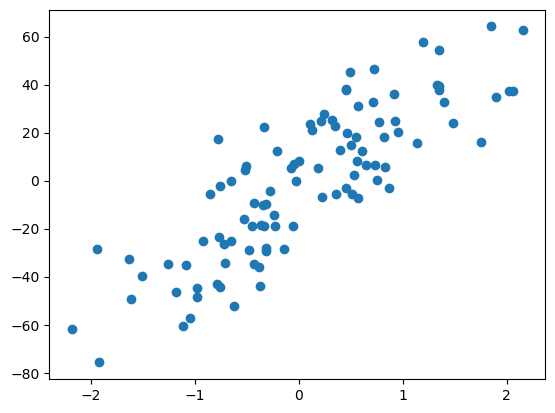

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

print(lr.intercept_,lr.coef_)

-2.29474455867698 [27.82809103]


In [5]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=10)
rr.fit(X,y)

print(rr.intercept_,rr.coef_)

-2.1269130035235726 [24.9546267]


In [6]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)

print(rr1.intercept_,rr1.coef_)

-1.4248441496033308 [12.93442104]


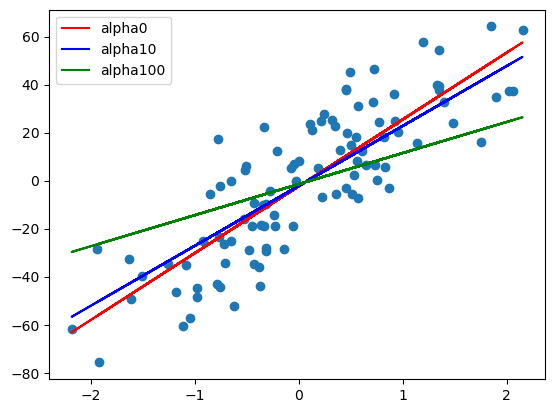

In [7]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red',label='alpha0')
plt.plot(X,rr.predict(X),color='blue',label='alpha10')
plt.plot(X,rr1.predict(X),color='green',label='alpha100')
plt.legend()
plt.show()

In [8]:
class MyRR:
    
    def __init__(self,alpha=0.1):
        self.alpha=alpha
        self.m = None
        self.b = None
    
    def fit(self,X_train,y_train):
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean()) * (X_train[i] - X_train.mean()) 
            den = den + (X_train[i] - X_train.mean()) * (X_train[i] - X_train.mean())
            
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m * X_train.mean())
        
        print(self.m,self.b)
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [9]:
reg = MyRR(alpha=10)
reg.fit(X,y)

[24.9546267] [-2.126913]


In [10]:
reg = MyRR(alpha=100)
reg.fit(X,y)

[12.93442104] [-1.42484415]
